In [157]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

In [158]:
# Load the dataset
df=pd.read_csv("LoanApprovalPrediction.csv")
print("Data Loaded Successfully.")

Data Loaded Successfully.


In [159]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [160]:
# Display basic information about the dataset
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [161]:
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
count  586.000000       598.000000         598.000000  577.000000   
mean     0.755973      5292.252508        1631.499866  144.968804   
std      1.007751      5807.265364        2953.315785   82.704182   
min      0.000000       150.000000           0.000000    9.000000   
25%      0.000000      2877.500000           0.000000  100.000000   
50%      0.000000      3806.000000        1211.500000  127.000000   
75%      1.750000      5746.000000        2324.000000  167.000000   
max      3.000000     81000.000000       41667.000000  650.000000   

       Loan_Amount_Term  Credit_History  
count        584.000000      549.000000  
mean         341.917808        0.843352  
std           65.205994        0.363800  
min           12.000000        0.000000  
25%          360.000000        1.000000  
50%          360.000000        1.000000  
75%          360.000000        1.000000  
max          480.0000

In [162]:
# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())



Missing Values per Column:
Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64


In [163]:
# Handle missing values using median/mode
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

In [164]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [165]:
# Drop unnecessary columns
col=['Loan_ID', 'Gender', 'Dependents', 'Property_Area']
df.drop(col, axis=1, inplace=True)
print("\nRemaining Columns After Dropping Loan_ID:", df.columns)


Remaining Columns After Dropping Loan_ID: Index(['Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status'],
      dtype='object')


In [166]:
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print("\nCategorical Variables Encoded.")


Categorical Variables Encoded.


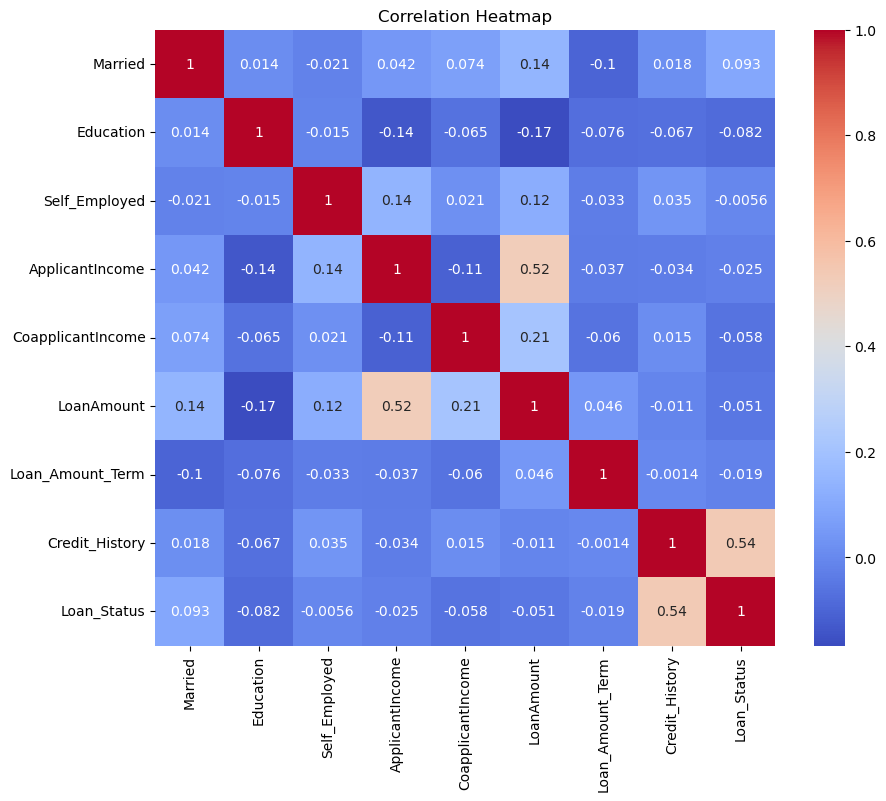

In [167]:
# Visualizing correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [168]:
df.head()

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,0,0,5849,0.0,127.0,360.0,1.0,1
1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,0,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,2583,2358.0,120.0,360.0,1.0,1
4,0,0,0,6000,0.0,141.0,360.0,1.0,1


In [169]:
# Splitting data into train and test sets
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData Split into Train and Test Sets.")



Data Split into Train and Test Sets.


In [170]:

# Standard Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("\nData Standardized.")


Data Standardized.


In [171]:
X_train.shape,X_test.shape

((478, 8), (120, 8))

In [172]:
# Model Training and Evaluation

model= LogisticRegression()
    

In [173]:

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nModel Evaluation Complete.")

Accuracy: 0.825
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.43      0.59        35
           1       0.81      0.99      0.89        85

    accuracy                           0.82       120
   macro avg       0.87      0.71      0.74       120
weighted avg       0.85      0.82      0.80       120

Confusion Matrix:
 [[15 20]
 [ 1 84]]

Model Evaluation Complete.


In [174]:
import pickle
with open('loan_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("model saved")

model saved
